In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load and prepare the data
def load_data(csv_file, base_image_dir, test_size=0.2, random_state=42):
    df = pd.read_csv(labels_path)
    X = []
    y = []
    label_map = {
        0: 'No_DR',
        1: 'Mild',
        2: 'Moderate',
        3: 'Severe',
        4: 'Proliferate_DR'
    }
    for index, row in df.iterrows():
        image_filename = row['id_code']
        label = row['diagnosis']
        image_path = os.path.join(base_image_dir, f"{label_map[label]}/{image_filename}.png")
        X.append(image_path)
        y.append(label)
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

In [19]:
# Preprocess image
def preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.efficientnet.preprocess_input(img_array)
    return img_array

In [20]:
# Evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = []
    for img_path in X_test:
        img = preprocess_image(img_path)
        pred = model.predict(img, verbose=0)
        predictions.append(np.argmax(pred))
    
    return predictions

In [21]:
# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [22]:
# Parameters
base_image_dir = '../archive/gaussian_filtered_images'
labels_path = '../archive/train.csv'
csv_file = 'path/to/your/data.csv'
model_path = '../models/efficientnet_model.keras'
class_names = ['No_DR', 'Mild', 'Moderate', 'Severe', 'Proliferate_DR']

# Load data
X_train, X_test, y_train, y_test = load_data(labels_path, base_image_dir)

# Load model
model = tf.keras.models.load_model(model_path)

In [23]:
# Get predictions
y_pred = evaluate_model(model, X_test, y_test)

                precision    recall  f1-score   support

         No_DR       0.87      0.98      0.92       351
          Mild       0.48      0.31      0.38        68
      Moderate       0.67      0.82      0.73       213
        Severe       0.67      0.11      0.19        36
Proliferate_DR       0.42      0.17      0.24        65

      accuracy                           0.76       733
     macro avg       0.62      0.48      0.49       733
  weighted avg       0.73      0.76      0.72       733



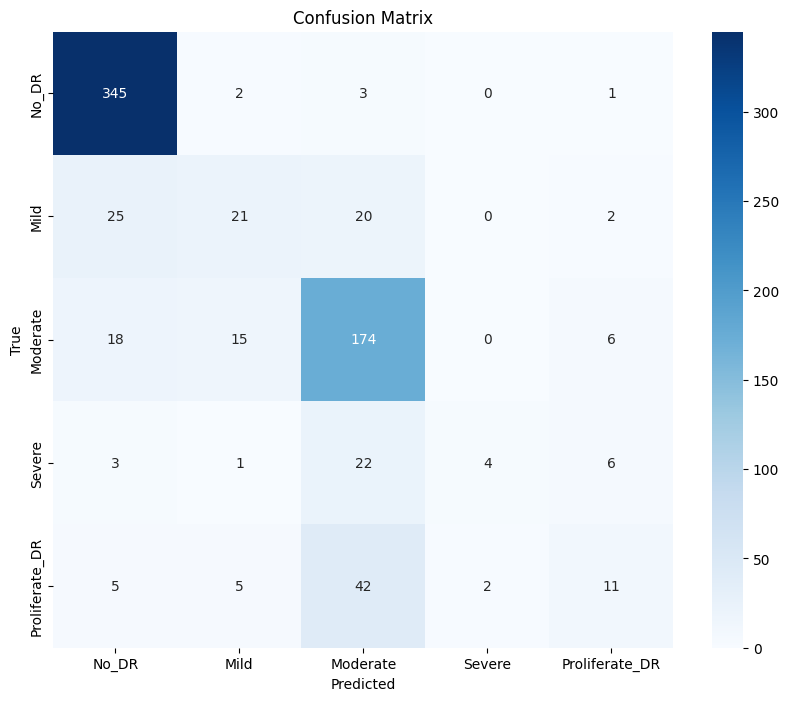

In [24]:
# Print classification report
print(classification_report(y_test, y_pred, target_names=class_names))

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, class_names)